In [1]:
import basc

import astropy
from astropy.table import Table
from astropy.io import fits

# silent Warning, when open image using aplpy
import warnings
from astropy.utils.exceptions import AstropyWarning 
warnings.simplefilter('ignore', category=AstropyWarning)

import matplotlib
import matplotlib.pyplot as plt

import aplpy

basc.readConfig("config.txt")

%matplotlib inline

/scratch/home/rwibowo/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
# Generate a view objecct to work with
newView = basc.view()

In [3]:
image_file = 'concat_123.cont.iter0.image.fits'
psf_file   = 'concat_123.cont.iter0.psf.fits'
flux_file  = 'concat_123.cont.iter0.flux.fits'

In [4]:
# Load in the fits files
newView.loadMap(image_file)
newView.loadBeam(psf_file)
newView.loadPBCor(flux_file)

In [5]:
# Run the MCMC process
newView.run()
result = newView.getChain()

In [6]:
print("Evidence: {}".format(newView.getEvidence()))
print("RMS residual: {}".format(newView.getRMS()))

result.write("chain.txt", format="ascii", overwrite=True)
print("Models written to chain.txt")

print("Sources detected:")
print(newView.clusters(eps=3)[0])

Evidence: 14868.802589451816
RMS residual: 0.00014461253436057783
Models written to chain.txt
Sources detected:
        x                  y          ...         dy                  F         
------------------ ------------------ ... ------------------ -------------------
128.04362904429436 128.94497226675352 ... 0.7363133250557918 0.13434334089230873


In [7]:
fits.info(image_file)

Filename: concat_123.cont.iter0.image.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1387   (512, 512, 1, 1)   float32   


In [8]:
image_data = fits.getdata(image_file)
psf_data = fits.getdata(psf_file)
flux_data = fits.getdata(flux_file)

In [9]:
image_data.shape

(1, 1, 512, 512)

In [10]:
image_data[0][0].shape

(512, 512)

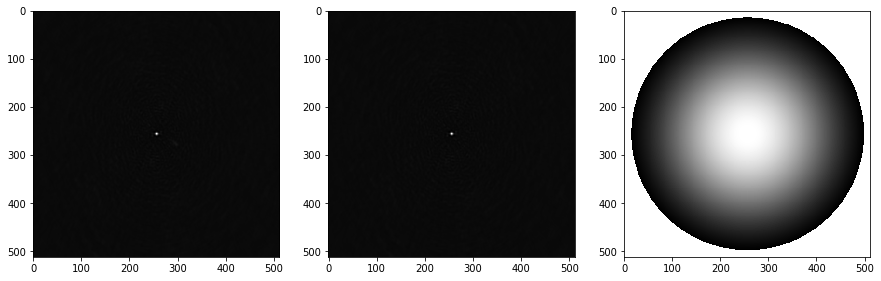

In [11]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(image_data[0][0], cmap='gray')

plt.subplot(132)
plt.imshow(psf_data[0][0], cmap='gray')

plt.subplot(133)
plt.imshow(flux_data[0][0], cmap='gray')

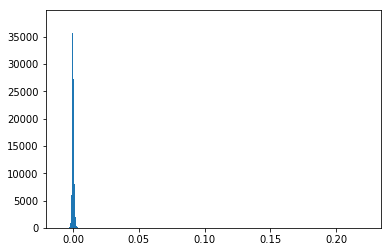

In [12]:
histogram = plt.hist(image_data[0][0].flatten(), 1000)

INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Auto-setting vmin to -2.987e-03 [aplpy.core]
INFO: Auto-setting vmax to  3.646e-03 [aplpy.core]


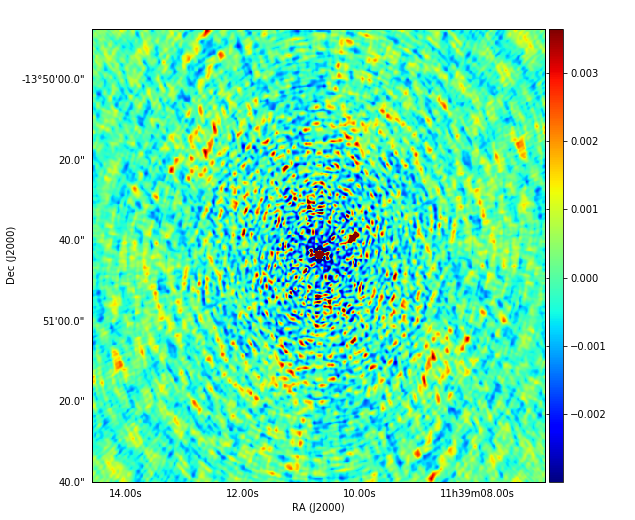

In [13]:
image = aplpy.FITSFigure(image_file)
image.show_colorscale()
image.show_colorbar()
#image.show_contour()

INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Auto-setting vmin to -1.333e-02 [aplpy.core]
INFO: Auto-setting vmax to  1.580e-02 [aplpy.core]


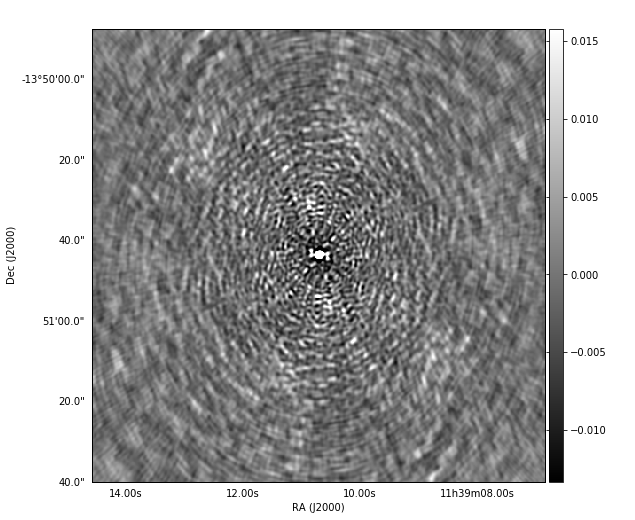

In [14]:
psf = aplpy.FITSFigure(psf_file)
psf.show_grayscale()
psf.show_colorbar()
#psf.show_contour()

In [15]:
newView.clusters()

(<Table length=1>
         x                  y          ...         dy                  F         
      float64            float64       ...      float64             float64      
 ------------------ ------------------ ... ------------------ -------------------
 128.06782849345888 128.82620637757438 ... 0.6077028784690125 0.14339558831011523,
 22)

In [16]:
result

x,y,F,k,L
float64,float64,float64,int64,float64
168.61031851172447,149.20863917469978,0.012823613393814836,0,20579.78732818835
126.67149516940117,129.61599561572075,0.009689244020875865,0,20579.78732818835
165.18450418114662,145.29230818152428,0.007864683653541451,0,20579.78732818835
229.93696084618568,128.48225608468056,0.00017191506160055763,0,20579.78732818835
128.27064034342766,128.75859460234642,0.21758915051137823,0,20579.78732818835
169.0287215411663,150.7898387014866,0.014604066465281675,1,20586.27442347954
165.87367710471153,146.0960774719715,0.009649844864149493,1,20586.27442347954
219.25490948557854,130.747535020113,0.0007589216796962306,1,20586.27442347954
128.5499264895916,128.59161201119423,0.218599858848486,1,20586.27442347954


In [17]:
newView.getRMS()

0.00014461253436057783

In [18]:
newView.getEvidence()

14868.802589451816

In [19]:
newView.resid

array([[ 2.30410742e-06,  1.80164557e-06,  1.45048918e-05, ...,
         7.60200125e-05,  7.68039992e-05,  8.89821747e-05],
       [-2.00775369e-05, -9.19788275e-06,  1.63991529e-05, ...,
         6.55791910e-05,  6.67421659e-05,  7.85293693e-05],
       [-2.34137035e-05,  1.25262121e-06,  3.53288176e-05, ...,
         4.79871437e-05,  5.37337619e-05,  6.76031793e-05],
       ...,
       [ 9.03228059e-05,  1.01891743e-04,  1.06000670e-04, ...,
         6.51846486e-06, -1.16376258e-05, -2.93327190e-05],
       [ 5.64329781e-05,  7.10396514e-05,  8.81629197e-05, ...,
         1.62425168e-06, -1.56392308e-05, -3.08418350e-05],
       [ 2.74366429e-05,  4.43322015e-05,  7.32917342e-05, ...,
        -1.97369420e-06, -1.47644191e-05, -2.46405422e-05]])

In [20]:
newView.resid.shape

(256, 256)

In [21]:
# RMS: 0.00086699493113